In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Eye_Dataset.zip" -d "/content/Eye_Dataset"

In [20]:
!ls /content/Eye_Dataset/Eye_Dataset


closed	open


In [21]:
import os

closed_path = '/content/Eye_Dataset/Eye_Dataset/closed'
open_path = '/content/Eye_Dataset/Eye_Dataset/open'

num_closed = len(os.listdir(closed_path))
num_open = len(os.listdir(open_path))

print(f"Number of CLOSED eye images: {num_closed}")
print(f"Number of OPEN eye images: {num_open}")


Number of CLOSED eye images: 726
Number of OPEN eye images: 726


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    '/content/Eye_Dataset/Eye_Dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    '/content/Eye_Dataset/Eye_Dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)



Found 1162 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


In [27]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

# Final model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7327 - loss: 0.4995 - val_accuracy: 0.9241 - val_loss: 0.1991
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9762 - loss: 0.1218 - val_accuracy: 0.9448 - val_loss: 0.1370
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9826 - loss: 0.0793 - val_accuracy: 0.9517 - val_loss: 0.1160
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9837 - loss: 0.0669 - val_accuracy: 0.9655 - val_loss: 0.1039
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9857 - loss: 0.0525 - val_accuracy: 0.9655 - val_loss: 0.1005
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9907 - loss: 0.0447 - val_accuracy: 0.9655 - val_loss: 0.0904
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9851 - loss: 0.0457 - val_accuracy: 0.9552 - val_loss: 0.1007
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9814 - loss: 0.0459 - val_accuracy: 0.9517 - val_loss

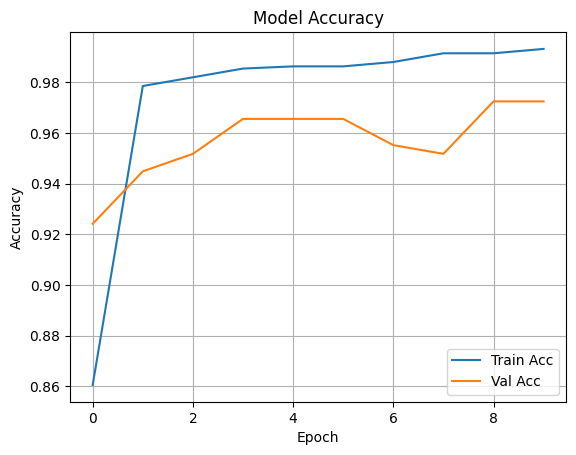

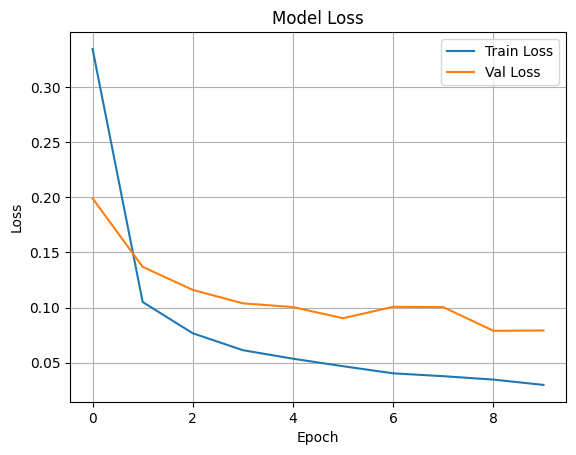

In [29]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [42]:
model.save("eye_state_model.h5")


In [35]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


val_data = datagen.flow_from_directory(
    '/content/Eye_Dataset/Eye_Dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)




# Predict again using updated val_data
val_data.reset()  # Start from beginning

pred_probs = model.predict(val_data, verbose=1)
preds = (pred_probs > 0.5).astype(int).reshape(-1)
true_labels = val_data.classes

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, preds, target_names=['closed', 'open']))

# Basic Metrics
print(f"\nAccuracy:  {accuracy_score(true_labels, preds):.4f}")
print(f"Precision: {precision_score(true_labels, preds):.4f}")
print(f"Recall:    {recall_score(true_labels, preds):.4f}")
print(f"F1 Score:  {f1_score(true_labels, preds):.4f}")


Found 290 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
Confusion Matrix:
 [[143   2]
 [  6 139]]

Classification Report:
              precision    recall  f1-score   support

      closed       0.96      0.99      0.97       145
        open       0.99      0.96      0.97       145

    accuracy                           0.97       290
   macro avg       0.97      0.97      0.97       290
weighted avg       0.97      0.97      0.97       290


Accuracy:  0.9724
Precision: 0.9858
Recall:    0.9586
F1 Score:  0.9720


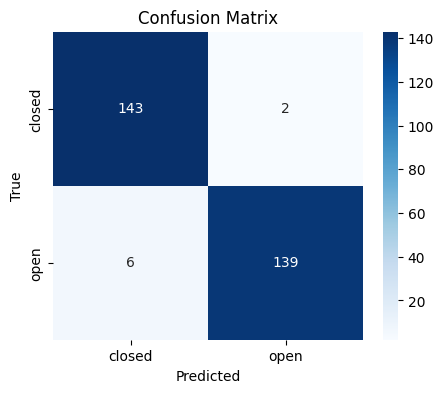

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['closed', 'open'],
            yticklabels=['closed', 'open'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [52]:
!pip install -q opencv-python-headless
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import cv2
import PIL.Image
import io
import base64
import numpy as np


In [53]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Take Photo';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize video for better display
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for the user to click the button
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getTracks().forEach(track => track.stop());
      div.remove();

      const dataUrl = canvas.toDataURL('image/jpeg', quality);
      return dataUrl;
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [61]:
def crop_eye_center(image_path):
    img = cv2.imread(image_path)
    h, w, _ = img.shape

    # Assume face is roughly centered
    crop_width = w // 3
    crop_height = h // 4
    x_start = (w - crop_width) // 2
    y_start = h // 4  # Slightly upper part of the face

    eye_crop = img[y_start:y_start+crop_height, x_start:x_start+crop_width]

    # Resize and normalize
    eye_img = cv2.resize(eye_crop, (224, 224)) / 255.0
    eye_img = np.expand_dims(eye_img, axis=0)

    return eye_img, eye_crop


In [71]:
photo_paths = []

for i in range(10):
    print(f"\n📷 Take photo #{i+1}")
    path = take_photo(filename=f'photo_{i+1}.jpg')
    photo_paths.append(path)



📷 Take photo #1


<IPython.core.display.Javascript object>


📷 Take photo #2


<IPython.core.display.Javascript object>


📷 Take photo #3


<IPython.core.display.Javascript object>


📷 Take photo #4


<IPython.core.display.Javascript object>


📷 Take photo #5


<IPython.core.display.Javascript object>


📷 Take photo #6


<IPython.core.display.Javascript object>


📷 Take photo #7


<IPython.core.display.Javascript object>


📷 Take photo #8


<IPython.core.display.Javascript object>


📷 Take photo #9


<IPython.core.display.Javascript object>


📷 Take photo #10


<IPython.core.display.Javascript object>

In [72]:
correct = 0
predictions = []

# Your ground truth labels — update as needed
true_labels = ['Open', 'Closed', 'Open', 'Closed', 'Open', 'Closed', 'Open', 'Closed', 'Open', 'Closed']

for i, path in enumerate(photo_paths):
    eye_img, _ = crop_eye_center(path)
    prob = model.predict(eye_img)[0][0]
    pred_label = 'Open' if prob > 0.5 else 'Closed'
    actual = true_labels[i]
    match = pred_label == actual
    predictions.append((pred_label, prob))

    print(f"Photo {i+1}: Predicted = {pred_label}, Actual = {actual}, ✅ {match}")
    correct += match

accuracy = correct / len(predictions)
print(f"\n🔍 Average Accuracy (eye crop only): {accuracy:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Photo 1: Predicted = Open, Actual = Open, ✅ True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Photo 2: Predicted = Closed, Actual = Closed, ✅ True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Photo 3: Predicted = Open, Actual = Open, ✅ True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Photo 4: Predicted = Closed, Actual = Closed, ✅ True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Photo 5: Predicted = Open, Actual = Open, ✅ True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Photo 6: Predicted = Closed, Actual = Closed, ✅ True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Photo 7: Predicted = Open, Actual = Open, ✅ True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Photo 8: Predicted = Closed, Actual = Closed, ✅ True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Photo 9: Predicted = Open, Actual = Open, ✅ True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Photo 10: Predicted = Closed, Actual = Closed, ✅ True

🔍 Average Accuracy (eye crop only): 100.00%
